In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [27]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784')


In [4]:
X = dataset.data
y = dataset.target
y = y.astype('int32')
#y

In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#X[0]

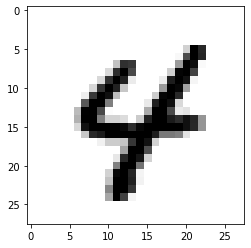

In [6]:
def print_digit(index):
    some_digit = X[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, 'binary')
    plt.show()
print_digit(37899)    

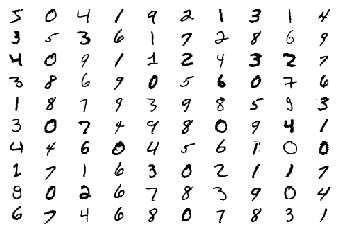

In [32]:
X_plot = X.reshape((70000, 28 ,28))
for i in range (100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_plot[i],"binary")
    plt.axis('off')
    plt.xlabel('label : {}'.format(y[i]))
plt.show()



In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

lin_reg.fit(X_train,y_train)
dtf.fit(X_train,y_train)
nb.fit(X_train,y_train)

print(lin_reg.score(X_test,y_test))
print(dtf.score(X_test,y_test))
print(nb.score(X_test,y_test))



-6.801469184806444e+17
0.8702857142857143
0.541047619047619


# ACCURACY on whole data: 61.8,100,55.8


# Accuracy  on test data : -68.0,87.2,54.1



In [11]:
y_pred_nb = nb.predict(X_test)
y_pred_dtf = dtf.predict(X_test)



In [25]:
from sklearn.metrics import confusion_matrix
cdt = confusion_matrix(y_test, y_pred_dtf) 
cnb = confusion_matrix(y_test, y_pred_nb) 

from sklearn.metrics import precision_score, recall_score,f1_score
pdt = precision_score(y_test, y_pred_dtf,average = 'micro')
pnb = precision_score(y_test, y_pred_nb,average = 'micro')
rdt = recall_score(y_test, y_pred_dtf,average = 'micro')
rnb = recall_score(y_test, y_pred_nb,average = 'micro')
fdt = f1_score(y_test, y_pred_dtf,average = 'micro')
fnb = f1_score(y_test, y_pred_nb,average = 'micro')


0.541047619047619

 # In macro 
  pdt = 86.8,rdt = 86.8 ,fdt = 86.8
 pnb = 66.9, rnb = 53.1 , fnb = 48.9
 # In micro
 pdt =  87.0 ,rdt =  87.0, fdt =87.0
 pnb = 54.1   ,rnb = 54.1   , fnb = 54.1